## **Teste de hipóteses para verificar se a adição de um botão em uma página de um site de comercio eletrônico faz sentido para a empresa**

In [71]:
from platform import python_version
print("Versão Python:{}".format(python_version()))

Versão Python:3.10.9


In [9]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
random.seed(42)

In [10]:
%reload_ext watermark
%watermark -a "José Guilherme Daufenbach Júnior" --iversions

Author: José Guilherme Daufenbach Júnior

statsmodels: 0.13.5
pandas     : 2.0.2
scipy      : 1.7.3
numpy      : 1.22.1
seaborn    : 0.12.2
matplotlib : 3.7.1



### Carregamento dos Dados:

In [11]:
dados = pd.read_csv("dados/dataset.csv")

In [14]:
dados.shape

(294460, 5)

In [15]:
dados.sample(10)

,id_usuario,timestamp,grupo,pagina,converteu
284686,850509,2023-01-13 09:46:44.068414,controle,pagina_sem_cta,0
245274,917847,2023-01-22 22:36:12.887925,tratamento,pagina_com_cta,0
115405,657672,2023-01-17 21:08:58.930114,controle,pagina_sem_cta,0
200104,853861,2023-01-11 03:17:35.489813,controle,pagina_sem_cta,0
163796,842878,2023-01-05 03:39:56.004226,controle,pagina_sem_cta,0
7157,632387,2023-01-15 18:15:25.341697,tratamento,pagina_com_cta,0
126747,891302,2023-01-19 22:14:01.867978,tratamento,pagina_com_cta,0
4381,941400,2023-01-07 04:10:25.986193,tratamento,pagina_com_cta,0
100386,670362,2023-01-20 15:08:14.501432,controle,pagina_sem_cta,0
176367,671010,2023-01-21 05:34:16.410838,tratamento,pagina_com_cta,0


### Análise exploratória dos dados:

In [17]:
print(dados.isnull().sum()) #verifica valores nulos

id_usuario    0
timestamp     0
grupo         0
pagina        0
converteu     0
dtype: int64


In [18]:
print(dados['grupo'].value_counts())

grupo
controle      147270
tratamento    147190
Name: count, dtype: int64


<Axes: xlabel='grupo', ylabel='count'>

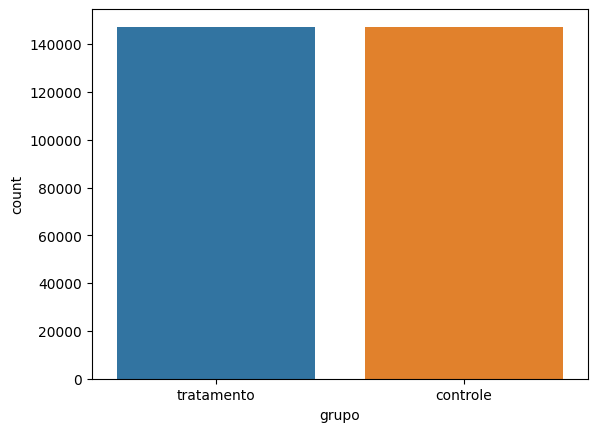

In [19]:
sns.countplot(data = dados, x = 'grupo')

In [20]:
print(pd.crosstab(dados['grupo'], dados['converteu']))

converteu        0      1
grupo                    
controle    129756  17514
tratamento  129467  17723


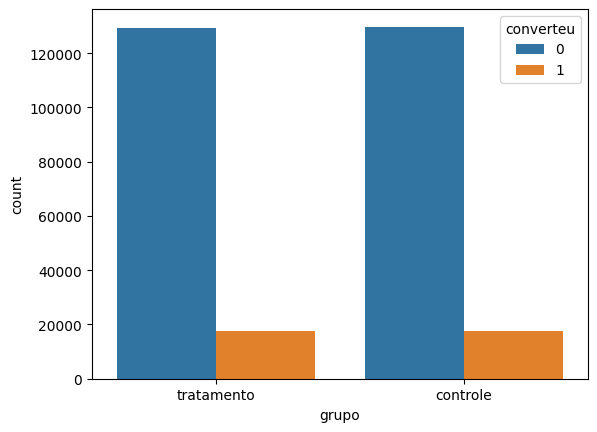

In [23]:
sns.countplot(data = dados, x = 'grupo', hue = 'converteu')
plt.show()

In [33]:
# Verifica a relação entre a coluna 'grupo' e a coluna 'pagina':
print(pd.crosstab(dados['grupo'], dados['pagina']))

pagina      pagina_com_cta  pagina_sem_cta
grupo                                     
controle              1965          145305
tratamento          145262            1928


### Teste A/B com Teste Estatístico

In [34]:
grupo_controle = dados[dados.grupo == 'controle']
grupo_tratamento = dados[dados.grupo == 'tratamento']

In [35]:
grupo_controle.head()

,id_usuario,timestamp,grupo,pagina,converteu
1,888545,2023-01-08 06:37:26.332945,controle,pagina_sem_cta,1
4,892356,2023-01-05 09:35:14.904865,controle,pagina_sem_cta,1
5,661590,2023-01-11 16:55:06.154213,controle,pagina_sem_cta,0
6,853541,2023-01-08 18:28:03.143765,controle,pagina_sem_cta,0
9,679687,2023-01-19 03:26:46.940749,controle,pagina_sem_cta,1


In [36]:
grupo_tratamento.head()

,id_usuario,timestamp,grupo,pagina,converteu
0,847721,2023-01-17 14:01:00.090575,tratamento,pagina_com_cta,0
2,851104,2023-01-21 22:11:48.556739,tratamento,pagina_com_cta,0
3,804228,2023-01-12 08:01:45.159739,tratamento,pagina_com_cta,0
7,864975,2023-01-21 01:52:26.210827,tratamento,pagina_com_cta,1
8,936923,2023-01-10 15:20:49.083499,tratamento,pagina_com_cta,0


In [37]:
taxa_controle = grupo_controle['converteu'].mean()
taxa_tratamento = grupo_tratamento['converteu'].mean()

In [40]:
print(taxa_controle*100,'%')
print(taxa_tratamento*100,'%')

11.892442452638011 %
12.040899517630274 %


In [41]:
#Teste de Hipótese:
alfa = 0.05
hipotese_nula = 'Não há diferença na taxa de conversão entre a pagina_com_cta e a pagina_sem_cta'
hipotese_aternativa = 'Há diferença na taxa de conversão entre a pagina_com_cta e a pagina_sem_cta'

In [42]:
estatistica_t, p_valor = stats.ttest_ind(grupo_controle['converteu'], grupo_tratamento['converteu'])

In [49]:
print(f"Estatística t: {estatistica_t}")
print(f"Valor-p: {p_valor}")

Estatística t: -1.2410056296293919
Valor-p: 0.21460465788124802


In [50]:
if p_valor < alfa:
    print(f"Rejeitamos a hipótese nula. {hipotese_alternativa}")
else:
    print(f"Falhamos em rejeitar a hipótese nula. {hipotese_nula}")
    

Falhamos em rejeitar a hipótese nula. Não há diferença na taxa de conversão entre a pagina_com_cta e a pagina_sem_cta


### Teste A/B com Regressão Logistica:

In [58]:
dados['grupo_encoded'] = pd.get_dummies(dados['grupo'], drop_first=True, dtype='int')

In [59]:
dados.head()

,id_usuario,timestamp,grupo,pagina,converteu,grupo_encoded
0,847721,2023-01-17 14:01:00.090575,tratamento,pagina_com_cta,0,1
1,888545,2023-01-08 06:37:26.332945,controle,pagina_sem_cta,1,0
2,851104,2023-01-21 22:11:48.556739,tratamento,pagina_com_cta,0,1
3,804228,2023-01-12 08:01:45.159739,tratamento,pagina_com_cta,0,1
4,892356,2023-01-05 09:35:14.904865,controle,pagina_sem_cta,1,0


In [63]:
y = dados['converteu']
x = dados['grupo_encoded']

In [64]:
x = sm.add_constant(x)

In [65]:
modelo_logit = sm.Logit(y,x)

In [66]:
modelo = modelo_logit.fit()

Optimization terminated successfully.
         Current function value: 0.366257
         Iterations 6


In [67]:
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:              converteu   No. Observations:               294460
Model:                          Logit   Df Residuals:                   294458
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:               7.140e-06
Time:                        14:20:23   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2146
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.0027      0.008   -248.774      0.000      -2.018      -1.987
grupo_encoded     0.0141      0.011      1.241      0.215      -0.008       0.036


In [68]:
#calculando os odds ratio
odds_ratio = pd.DataFrame({'coef': modelo.params, 'OR': np.exp(modelo.params)})

In [69]:
modelo.params

const           -2.002655
grupo_encoded    0.014092
dtype: float64

In [70]:
print(odds_ratio)

                   coef        OR
const         -2.002655  0.134976
grupo_encoded  0.014092  1.014192


## Conclusão:
#### Após o teste A/B para um site de comércio eletrônico a fim de dicidir se a empresa deveria implementar a nova página, verificou-se que não há evidências de que a taxa de conversão aumente no grupo de controle. Portanto, deixar a página na versão antiga parece o mais adequado.